# Estadísticas básicas del lenguaje

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [15]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/oem/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/oem/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/oem/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /home/oem/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/oem/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/oem/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/oem/nltk_data...
[nltk_data]    |   Package

# Analizando un texto

Escogemos `text1` que es el famoso libro Moby Dick

In [17]:
text1

<Text: Moby Dick by Herman Melville 1851>

Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....

In [19]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

¿Cuantos tokens tiene el libro?

In [20]:
print(len(text1))

260819


## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)

The [sets](https://docs.python.org/2/library/sets.html) module provides classes for constructing and manipulating unordered collections of unique elements

**Nota 1:** La función `sorted` convierte el diccionario `vocabulario` en una lista `vocabulario` y la ordena alfabéticamente

**Nota 2:** La función `len` convierte el diccionario `vocabulario` en una lista `vocabulario` y cuenta los elementos

In [24]:
# Obtener palabras unicas
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [25]:
print(len(vocabulario))

19317


Luego definimos la medida de riqueza léxica:

In [27]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


Podemos definir funciones en python para estas medidas léxicas:

In [31]:
def palabras_unicas(texto):
  return set(texto)

def palabras_unicas_ordenadas(texto):
  return sorted(set(texto))

def riqueza_lexica(texto):
  return len(palabras_unicas(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

In [32]:
riqueza_lexica(text1)

0.07406285585022564

Podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.

In [36]:
porcentaje_palabra('monster', text1)

0.018786974875296663

y calcular en conteo el numero de veces que aparece la palabra `monster`:

In [39]:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


**METODO NO** recomendable para conjuntos muy grandes

In [42]:
dic = {}
for word in set(text1):
    dic[word] = text1.count(word)

In [44]:
print(dic)

{'umbilical': 1, 'Gather': 1, 'neglect': 1, 'beaches': 3, 'Harmattans': 1, 'sire': 4, 'Savesoul': 2, 'courts': 1, 'prevail': 3, 'QUARTER': 2, 'billiard': 5, 'belongs': 8, 'similes': 1, 'guests': 4, 'Victory': 1, 'complained': 1, 'stalking': 1, 'Nat': 1, 'defined': 4, 'engaging': 1, 'sends': 1, 'Blinding': 1, 'suckled': 1, 'flexion': 1, 'scholars': 2, 'carried': 30, 'Arkansas': 1, 'Fiery': 1, 'purely': 3, 'shrunk': 1, 'lifetime': 5, 'hippogriff': 1, 'junior': 2, 'brick': 4, 'Bad': 2, 'marsh': 1, 'yonder': 16, 'diabolically': 1, 'salutation': 3, 'Mogul': 5, 'consign': 1, 'Sumatra': 6, '16th': 1, 'Said': 1, 'emigrant': 1, 'shun': 3, 'entranced': 1, 'Truth': 6, 'condemned': 4, 'Cape': 38, 'cabins': 1, 'THEE': 1, 'observed': 18, '--': 1070, 'angrily': 1, 'pilot': 25, 'spoiled': 4, 'subjected': 2, 'Loomings': 1, 'yelled': 6, 'intimacy': 1, 'reverend': 5, 'positively': 1, 'desk': 4, 'legal': 2, 'bottom': 52, 'HOMEWARD': 1, 'crept': 1, 'incarnated': 1, 'absorbed': 4, 'asylum': 1, 'pill': 1, 'l

## Método FreqDist de NLTK

**NLTK** tiene un metodo muy eficiente

In [45]:
fdist = FreqDist(text1)

La función `most_common` muestra los `x` primeras palabras que más se repiten (Incluye simbolos):

In [47]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

NLTK tambien tiene una función que grafica `plot`, la cual esta construida sobre `matplotlib`:

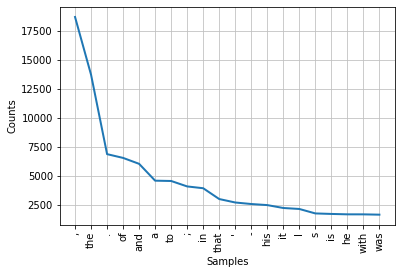

In [49]:
fdist.plot(20)

Al consultar `fdist` por una clave `x`, podemos ver cuantas veces se repite un palabra `x` especifica.

In [53]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica:

In [62]:
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
print(vocabulario_filtrado[:50])

['ACCOUNT', 'ADDITIONAL', 'ADVANCING', 'ADVENTURES', 'AFFGHANISTAN', 'AFRICA', 'AGAINST', 'ALFRED', 'ALGERINE', 'AMERICA', 'ANCHORS', 'ANIMAL', 'ANNALS', 'ANOTHER', 'APOLOGY', 'APPLICATION', 'APPROACHING', 'ARCTIC', 'AROUND', 'ASCENDING', 'ASPECT', 'ATTACK', 'ATTACKED', 'ATTITUDES', 'AUGUST', 'AUTHOR', 'Abashed', 'Abednego', 'Abjectus', 'Aboard', 'Abominable', 'Abraham', 'Academy', 'Accessory', 'According', 'Accordingly', 'Accursed', 'Achilles', 'Actium', 'Acushnet', 'Admiral', 'Admirals', 'Advance', 'Advancement', 'Adventures', 'Adverse', 'Advocate', 'Affected', 'Affidavit', 'Affrighted']


Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

Construimos la tubla con un bucle y condiciones de longitud y frecuencia: `(palabra, fdist[palabra])`. Se filtra por palabras que sean mayores a `5` caracteres y cuya frecuencia sea mayor a `10` repeticiones

In [68]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]

Convertimos el objeto anterior a un objeto de la librería `numpy`. `dtypes` le esta diciendo a `numpy`, como se debe interpretar los objetos que se quieren transformar. Se específica que el primer objeto se interpreta como un texto en formato `S10` y el segundo como un enterio `int`

In [79]:
dtypes = [('word', 'S10'), ('frequency', int)]

Con `np.array` convierte el objeto `palabras_interesantes` y tiene en cuenta los tipos de datos que se especifican en `dtypes`:

In [82]:
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

Al convertir una estructuras de datos a `numpy`, nos permite trabajr con estructuras de datos de forma más eficiente. Lo primero es ordenar nostro objeto con la función `np.sort`

In [83]:
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')

**Top** de palabras mas frecuentes

In [91]:
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

Construccion de un grafico de barras customizado con Matplotlib, con la librería: [Custom Ticker1](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py)


Definimos `x`, con el `top` de las palabras con mayor frecuencia, creando un arreglo con esa cantidad de palabras utilizando `np.arange`.

En `y` nos muestra la frecuencia de aparición (Elemento `1` de cada tupla del arreglo, ya que `palabras_ordenadas` es una lista de tuplas)

In [92]:
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]

Creamos una figura con un tamaño especifico `plt.figure(figsize=(10,5))`, le decimos que grafique variables `x,y` con `plt.plot(x, y)`, colocamos una maya en el grafico `plt.grid(True)`, y mostramos el grafico `plt.show()`

para definir a que palabra corresponde cada unto en el eje `x`, lo definimos con la función `plt.xticks`, donde se le dice que tome el primer elemento de la tupla para las etiquetas, ademas las rotamos verticalmente.

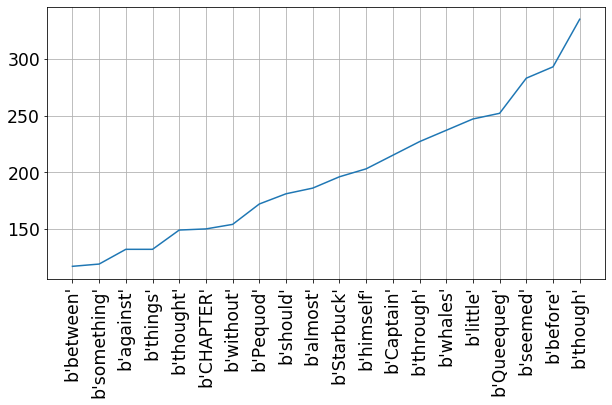

In [94]:
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()